# CodeLab 2 Классические методы машинного зрения

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [56]:
gray_image = cv2.imread('data/lena.png', cv2.IMREAD_GRAYSCALE)

# Look at the image pixels values
print(gray_image[:10, :10])

[[169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [170 170 165 163 168 167 166 167 167 167]
 [167 167 170 165 167 169 167 164 167 169]
 [165 165 164 164 166 166 164 165 166 167]
 [164 164 165 165 167 167 166 165 170 165]
 [163 163 165 165 164 163 163 165 168 162]]


[[16 16 16 16 16 16 17 16 17 16]
 [16 16 16 16 16 16 17 16 17 16]
 [16 16 16 16 16 16 17 16 17 16]
 [16 16 16 16 16 16 17 16 17 16]
 [16 16 16 16 16 16 17 16 17 16]
 [17 17 16 16 16 16 16 16 16 16]
 [16 16 17 16 16 16 16 16 16 16]
 [16 16 16 16 16 16 16 16 16 16]
 [16 16 16 16 16 16 16 16 17 16]
 [16 16 16 16 16 16 16 16 16 16]]


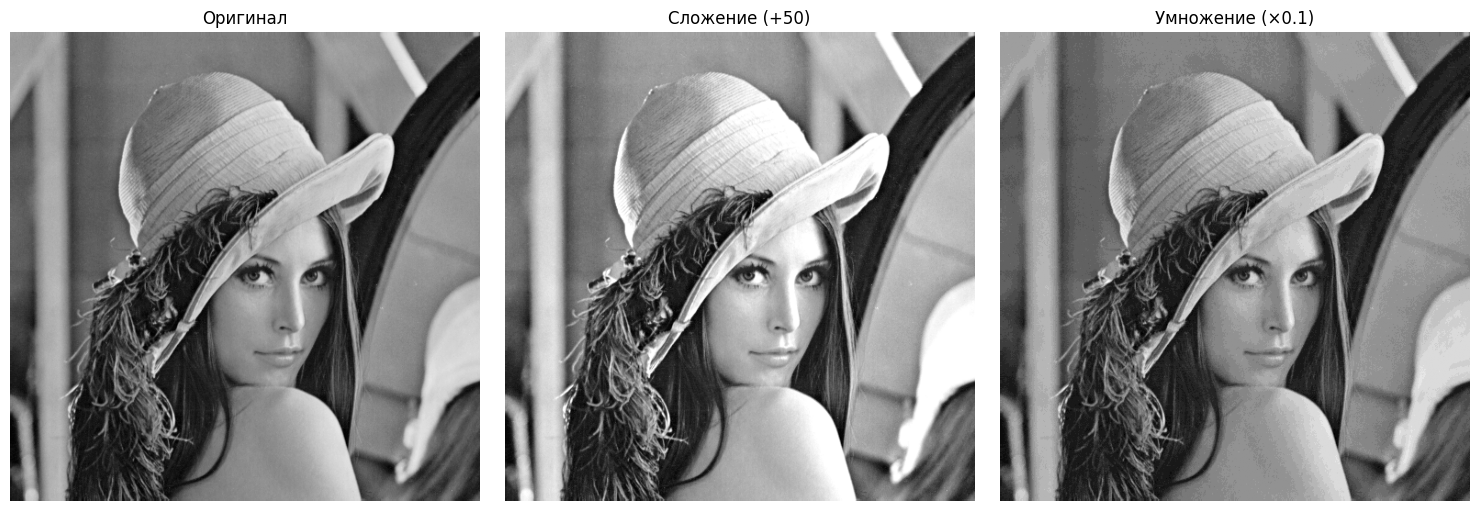

In [57]:
# Math operations on images
# Параметры операций
scalar_add = 50
scalar_mul = 0.1

# Сложение: увеличение яркости
# Обрезка диапазона значений до 255 включена в функцию cv2.add
added = cv2.add(gray_image, np.full_like(gray_image, scalar_add))

# Умножение: увеличение контраста
multiplied = gray_image *  scalar_mul

multiplied = np.clip(multiplied, 0, 255).astype(np.uint8)  # Обрезаем и приводим тип
print(multiplied[:10, :10])
# Настройка отображения через matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(added, cmap='gray')
plt.title(f'Сложение (+{scalar_add})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(multiplied, cmap='gray')
plt.title(f'Умножение (×{scalar_mul})')
plt.axis('off')

plt.tight_layout()
plt.show()

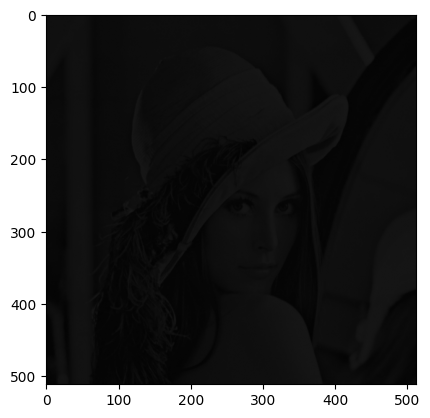

In [58]:
# Обратите внимание, matplotlib по умолчанию выравнивает диапазон яркости
# Отключим эту опцию
plt.imshow(multiplied, cmap='gray', vmin=0, vmax=255)

In [59]:
# Сделаем темные пиксели более яркими с помощью операции np.maximum()
nonlinear_img = np.maximum(gray_image, 100)


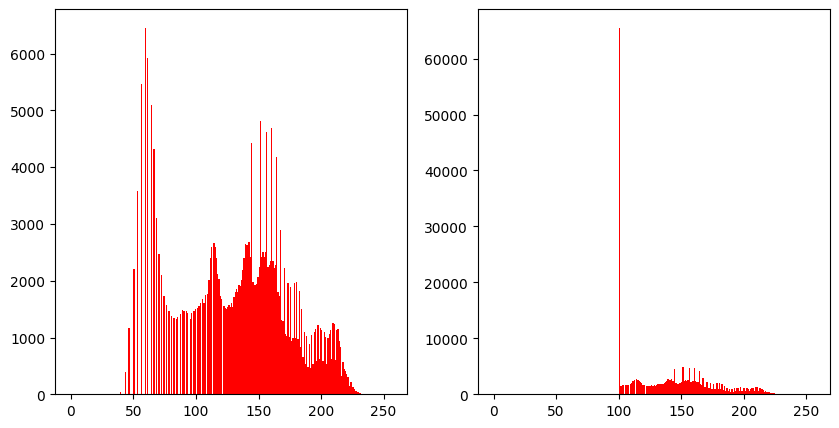

In [60]:
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(gray_image.flatten(), bins=256, range=[0,256], color = 'r')

plt.subplot(1,2,2)
plt.hist(nonlinear_img.flatten(), bins=256, range=[0,256], color = 'r')
plt.show()

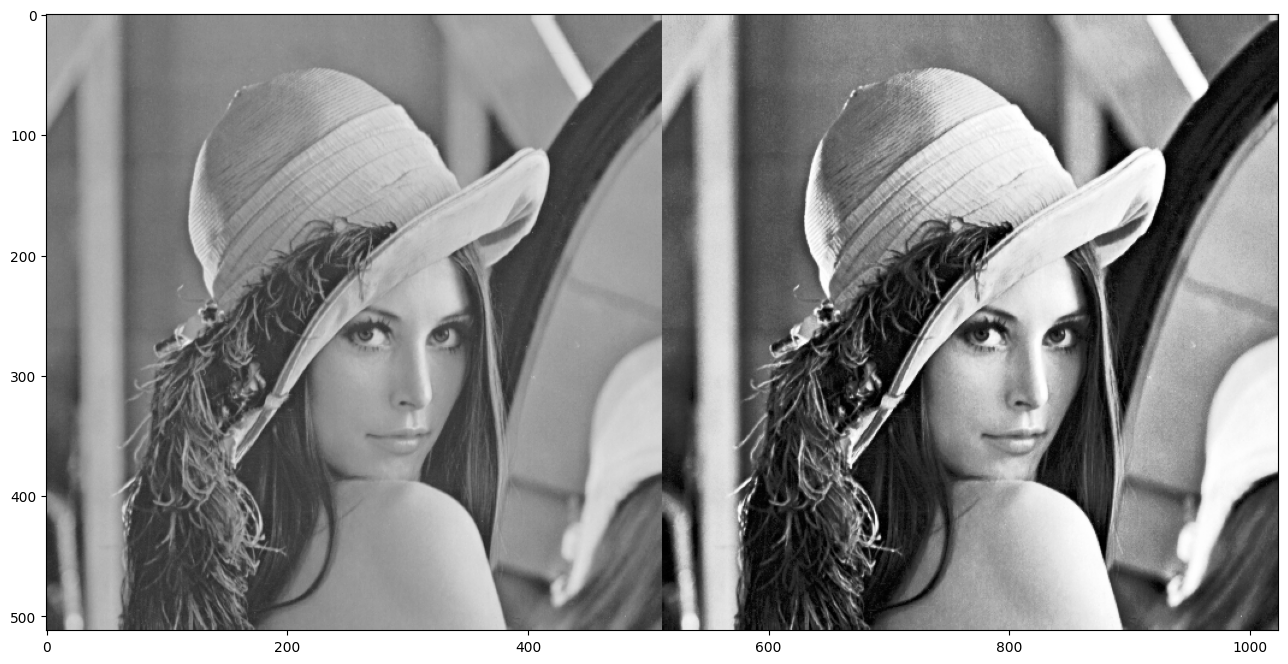

In [61]:
# Эквивализация гистограммы
equ_img = cv2.equalizeHist(gray_image)
result = np.hstack((gray_image, equ_img)) #stacking images side-by-side
plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='gray')

In [62]:
print(f'Original image mean: {gray_image.mean()}, std: {gray_image.std()}')
print(f'Equalized image mean: {equ_img.mean()}, std: {equ_img.std()}')

Original image mean: 132.42729568481445, std: 44.90209985629212
Equalized image mean: 128.65707778930664, std: 73.32327381285563


### Нормализация цветных изображений

(array([8.0000e+00, 1.0090e+03, 4.9764e+04, 6.3636e+04, 5.8579e+04,
        4.6524e+04, 1.7888e+04, 1.6847e+04, 7.4330e+03, 4.5600e+02]),
 array([  8. ,  29.7,  51.4,  73.1,  94.8, 116.5, 138.2, 159.9, 181.6,
        203.3, 225. ]),
 <BarContainer object of 10 artists>)

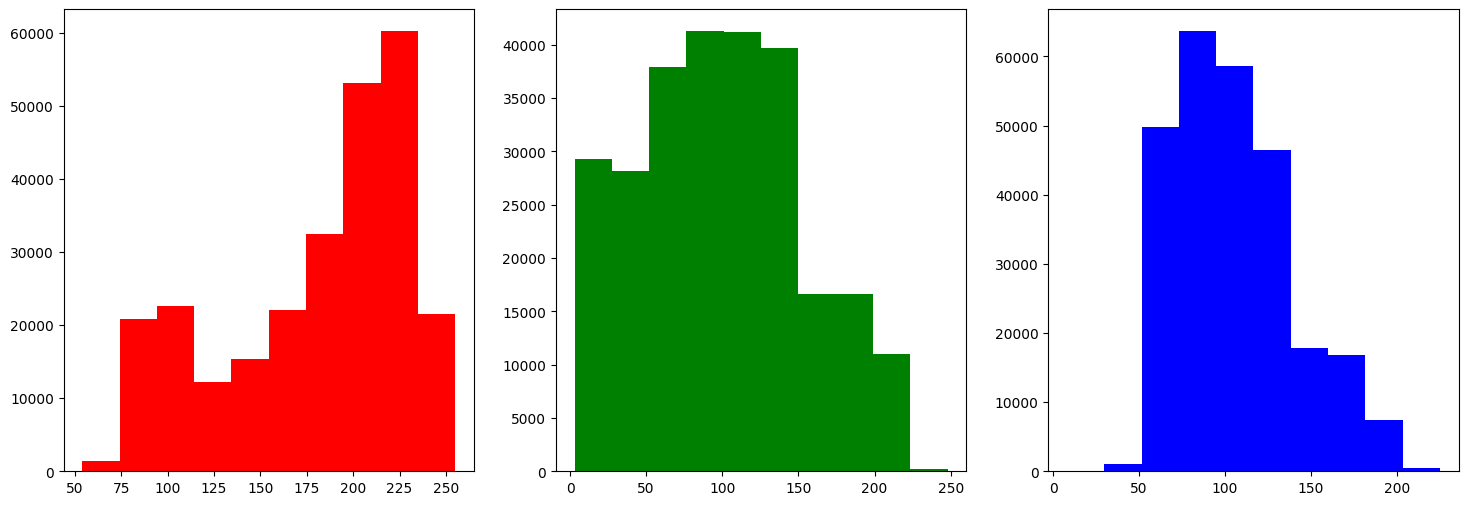

In [63]:
img = cv2.imread('data/lena.png', cv2.IMREAD_COLOR_RGB)

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.hist(img[:,:,0].ravel(), color='r')
plt.subplot(1,3,2)
plt.hist(img[:,:,1].ravel(), color='g')
plt.subplot(1,3,3)
plt.hist(img[:,:,2].ravel(), color='b')

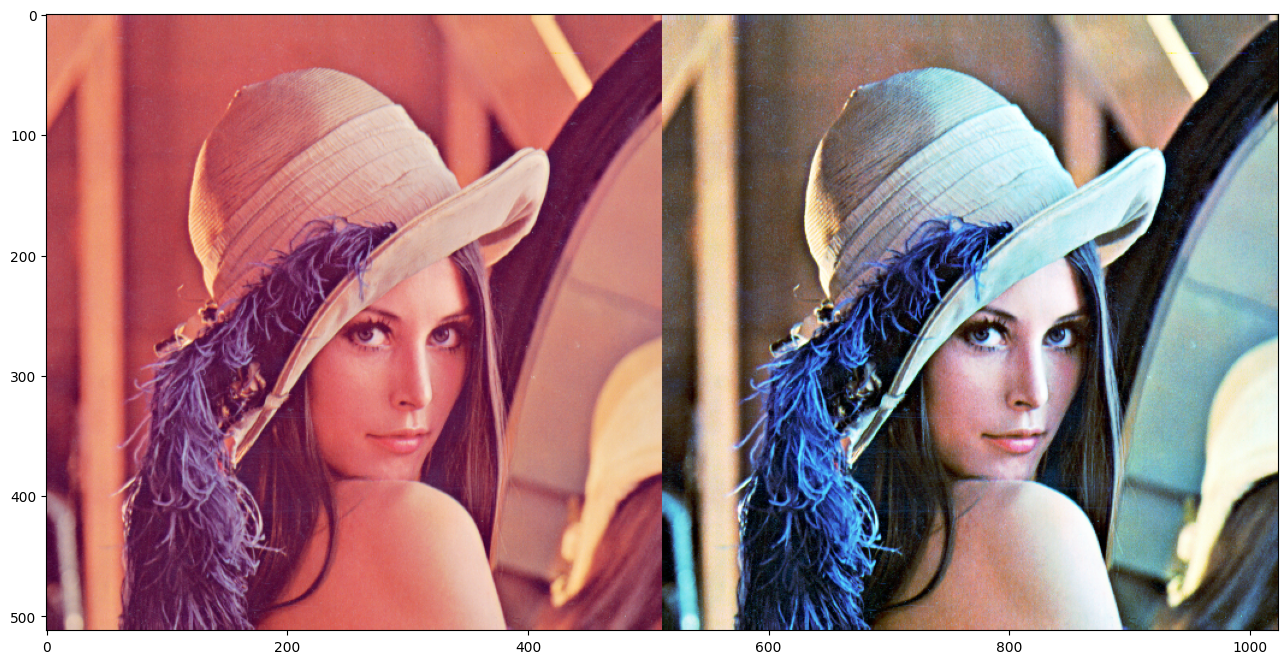

In [64]:
equ_r_img = cv2.equalizeHist(img[:,:,0])
equ_g_img = cv2.equalizeHist(img[:,:,1])
equ_b_img = cv2.equalizeHist(img[:,:,2])

equ_color_img = np.stack((equ_r_img, equ_g_img, equ_b_img), axis=-1)

result = np.hstack((img, equ_color_img)) #stacking images side-by-side
plt.figure(figsize=(16, 8))
plt.imshow(result)

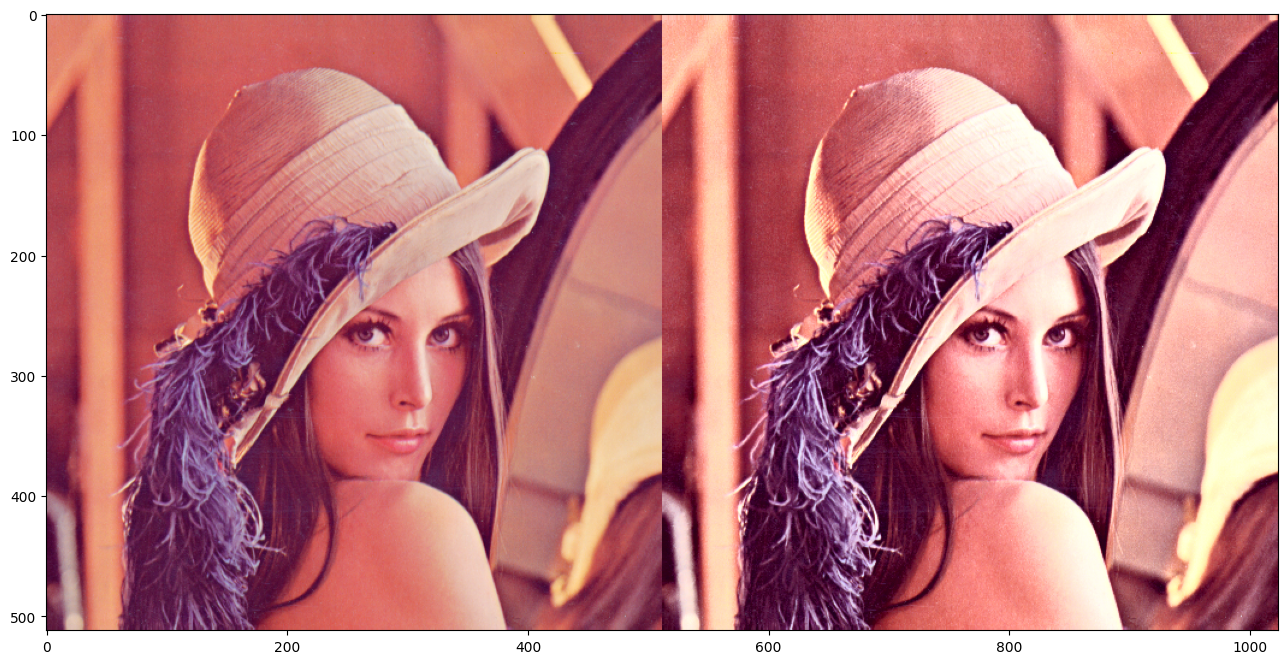

In [65]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

result = np.hstack((img, img_output)) #stacking images side-by-side
plt.figure(figsize=(16, 8))
plt.imshow(result)

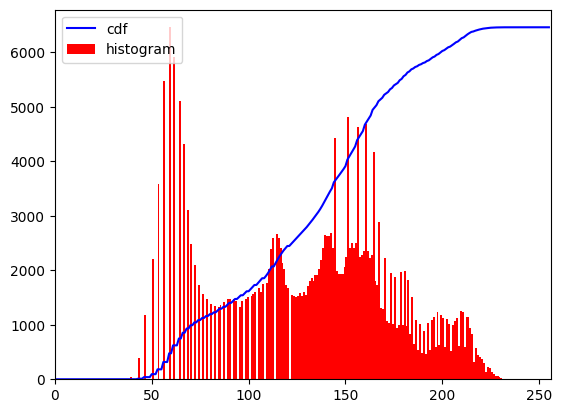

In [90]:
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(), bins=256, range=[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

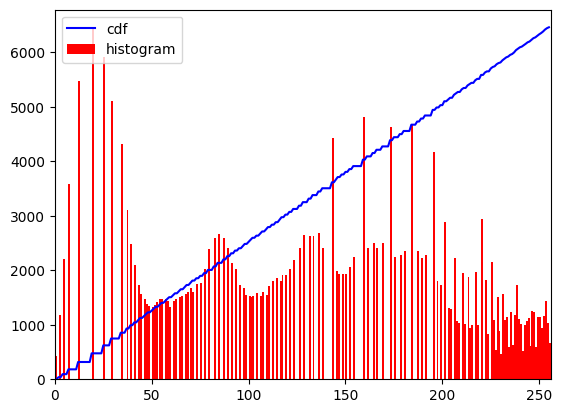

In [89]:
hist,bins = np.histogram(equ_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ_img.flatten(), bins=256, range=[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Свертка с ядром

In [68]:
median_img = np.zeros_like(gray_image)
M, N = gray_image.shape
KERNEL_SIZE = 5

In [69]:
%%time
# too long with python for-cycles
for x in range(M-KERNEL_SIZE):
  for y in range(N-KERNEL_SIZE):
    median_img[x, y] = np.mean(gray_image[x:x+KERNEL_SIZE, y:y+KERNEL_SIZE])

CPU times: user 687 ms, sys: 0 ns, total: 687 ms
Wall time: 687 ms


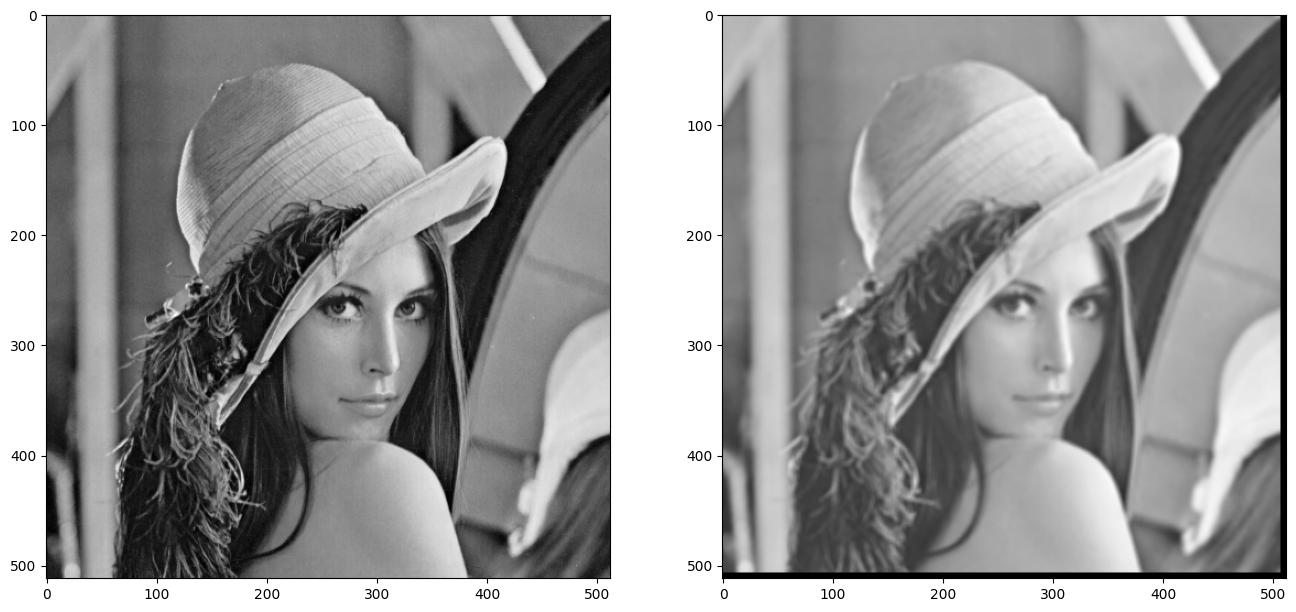

In [70]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(median_img, cmap='gray')

In [71]:
# Свертка с ядром, имеющим константные значения равноценна операции blur (размытие, усреднение)
KERNEL_SIZE = 5
kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE))
kernel = kernel/kernel.size
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [72]:
gray_image[:KERNEL_SIZE, :KERNEL_SIZE]

array([[169, 169, 168, 167, 169],
       [169, 169, 168, 167, 169],
       [169, 169, 168, 167, 169],
       [169, 169, 168, 167, 169],
       [169, 169, 168, 167, 169]], dtype=uint8)

In [73]:
# Поэлементной умножение окна изображения с коэффициентами маски и их суммирование
np.sum(gray_image[:KERNEL_SIZE, :KERNEL_SIZE] * kernel)

np.float64(168.39999999999998)

In [74]:
%%time
# much faster with opencv
img_median = cv2.filter2D(gray_image, -1, kernel)

CPU times: user 0 ns, sys: 636 μs, total: 636 μs
Wall time: 1.36 ms


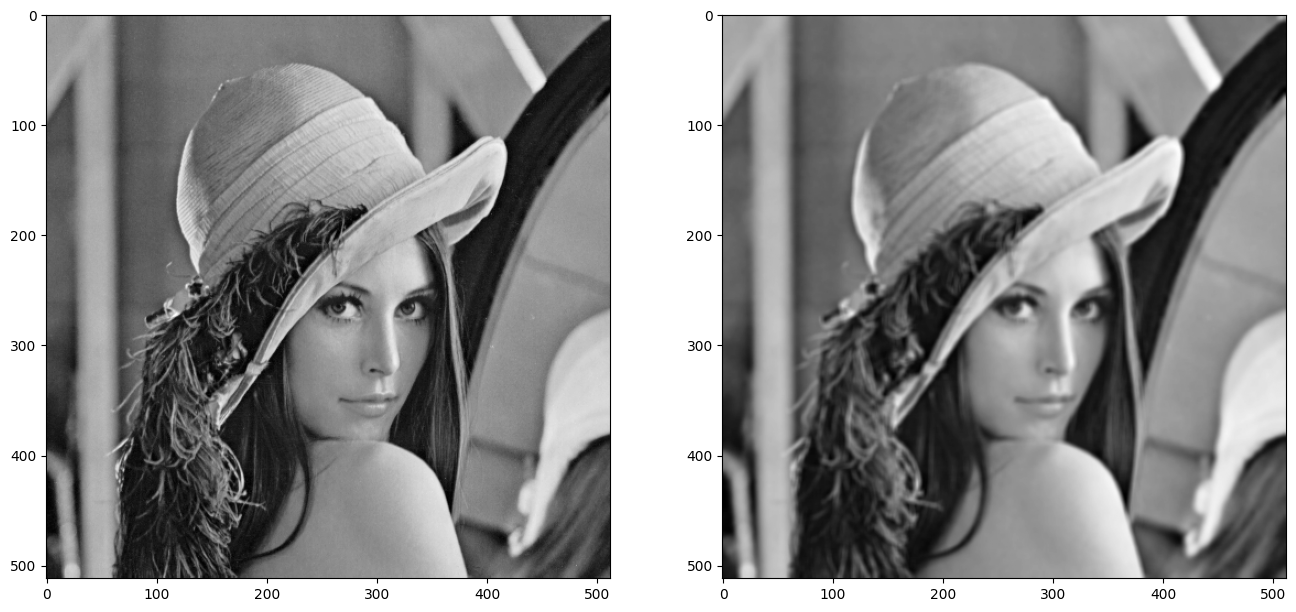

In [75]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_median, cmap='gray')

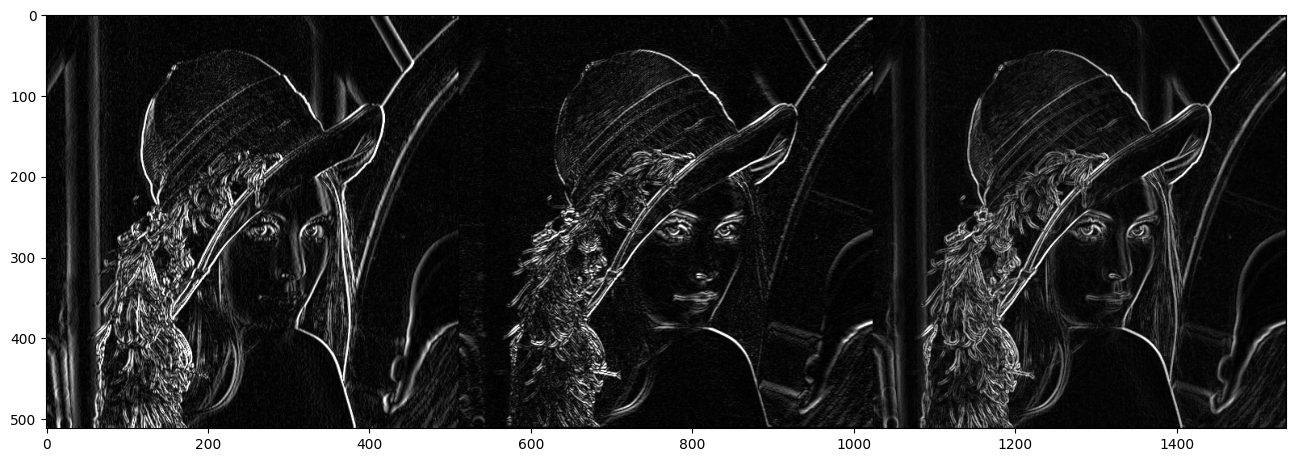

In [76]:
# Оператор Собеля для вычисления градиента изображения

grad_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)  
grad_y = cv2.Sobel(gray_image,cv2.CV_16S, 0, 1)  

absX = cv2.convertScaleAbs(grad_x)   # Перенести обратно на uint8  0-255
absY = cv2.convertScaleAbs(grad_y)  

sobel_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)  

plt.figure(figsize=(16, 8))
plt.imshow(np.hstack([absX, absY, sobel_img]), cmap='gray')

## Морфологические преобразования

In [77]:
!wget -O j.png https://docs.opencv.org/4.5.3/Morphology_1_Tutorial_Theory_Original_Image.png

--2026-02-18 11:44:31--  https://docs.opencv.org/4.5.3/Morphology_1_Tutorial_Theory_Original_Image.png
Resolving docs.opencv.org (docs.opencv.org)... 104.26.14.224, 104.26.15.224, 172.67.72.85, ...
Connecting to docs.opencv.org (docs.opencv.org)|104.26.14.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1126 (1,1K) [image/png]
Saving to: ‘j.png’

j.png               100%[===================>]   1,10K  --.-KB/s    in 0s      

2026-02-18 11:44:31 (31,0 MB/s) - ‘j.png’ saved [1126/1126]



In [78]:
j_img = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

In [79]:
element = np.array([[0, 1, 1, 0],
                    [1, 1, 1, 1],
                    [1, 1, 1, 1],
                    [0, 1, 1, 0]], dtype=np.uint8)

In [80]:
erosion_img = cv2.erode(j_img, element)
dilate_img = cv2.dilate(j_img, element)

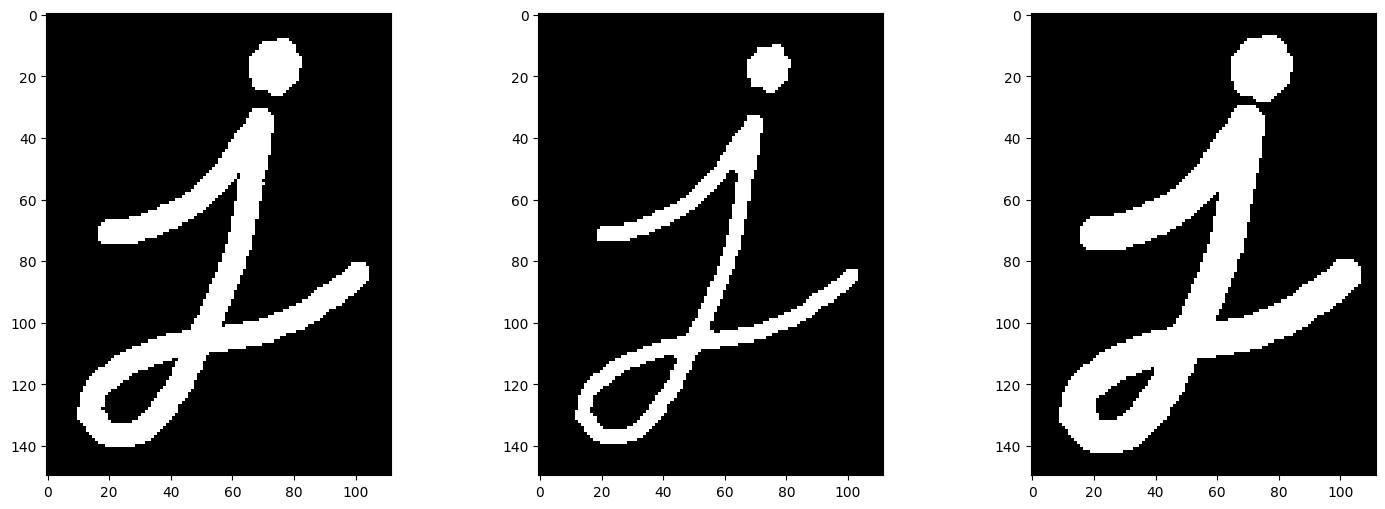

In [81]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(j_img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(erosion_img, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(dilate_img, cmap='gray')

## Геометрические (аффинные) преобразования изображения.


In [82]:
import string

# points a, b, c, d
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

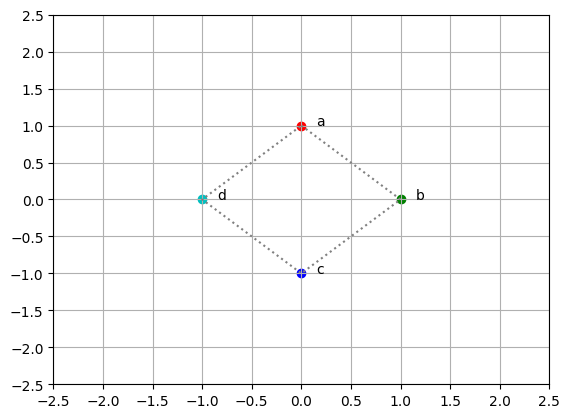

In [83]:
color_lut = 'rgbc' # ['r', 'g', 'b', 'c']
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

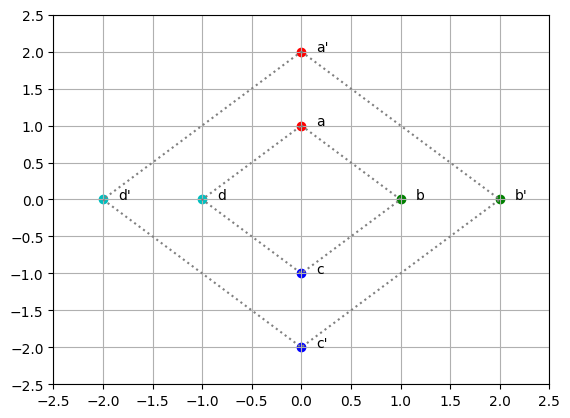

In [84]:
# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], 
                [0, 2, 0], 
                [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

# draw lines b/w points
xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))

plt.grid()
plt.show()

## Задания для самостоятельной работы

**Задание 1:** Реализуйте нормализацию изображения средствами numpy  

Нормализуйте изображения по формуле.
$$img_{n} = \frac{img - mean(img)}{std(img)} $$
Затем масштабируйте нормализованное изображение в интервал [0, 255]  

Отобразите результат вместе с оригинальным изображением и с эквивализированной гистограммой.  

In [85]:
# Code here


**Задание 2:** Отобразите результат свертки с масками (kernels) из лекции: горизонтальная, вертикальная и наклонная 45 градусов. Размер kernel должен быть 5х5.

In [86]:
# Code here

**Задание 3:** отобразите результаты операций cv2.opening and cv2.closing Изображения нужно подобрать самостоятельно, чтобы был виден результат преобразований.

In [87]:
# Code here


 **Задание 4**: реализуйте два любых на выбор аффинных преобразования из лекции. 

In [88]:
# Code here